<a href="https://colab.research.google.com/github/jackarl/programacion_analitica/blob/main/Pr%C3%A1ctica_25_Validaci%C3%B3n%2C_Evaluaci%C3%B3n_y_Selecci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Carga de Bibliotecas, Conjunto de Datos y Análisis Exploratorio de los Datos

- Declarar las bibliotecas necesarias para este proyecto
- Cargar el conjunto de datos Glioma Grading Clinical and Mutation Features. Se puede descargar de https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv("/content/drive/MyDrive/Tareas mayo/Arbol de decisiones/glioma+grading+clinical+and+mutation+features+dataset/TCGA_InfoWithGrade.csv")
df.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2. 📊 Análisis exploratorio de datos (EDA)

- Realiza un análisis inicial de los datos antes de modelar:

- Describir forma y estructura (shape, describe(), info()).

Mostrar la distribución de clases (y.value_counts()).

- Visualizar:

    - Histograma de al menos 3 variables numéricas.

    - Boxplots o violin plots por clase si es computacionalmente viable.

    - Mapa de calor de correlaciones entre variables.

🧠 Reflexiona:

¿Existen clases desbalanceadas?

¿Qué atributos parecen más informativos?

In [31]:

print(df.describe())
print("___________________________________")
print(f"filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("___________________________________")
print(df.info())
print("___________________________________")


            Grade      Gender  Age_at_diagnosis        Race        IDH1  \
count  839.000000  839.000000        839.000000  839.000000  839.000000   
mean     0.419547    0.418355         50.935411    0.107271    0.481526   
std      0.493779    0.493583         15.702339    0.369392    0.499957   
min      0.000000    0.000000         14.420000    0.000000    0.000000   
25%      0.000000    0.000000         38.055000    0.000000    0.000000   
50%      0.000000    0.000000         51.550000    0.000000    0.000000   
75%      1.000000    1.000000         62.800000    0.000000    1.000000   
max      1.000000    1.000000         89.290000    3.000000    1.000000   

             TP53        ATRX        PTEN        EGFR         CIC  ...  \
count  839.000000  839.000000  839.000000  839.000000  839.000000  ...   
mean     0.414779    0.258641    0.168057    0.133492    0.132300  ...   
std      0.492978    0.438149    0.374140    0.340309    0.339019  ...   
min      0.000000    0.00000

In [32]:
print(df["Grade"].value_counts())
print(f"Sin tumor: {(487/df.shape[0])*100}%, Con Tumor: {(352/df.shape[0])*100}%")

Grade
0    487
1    352
Name: count, dtype: int64
Sin tumor: 58.04529201430274%, Con Tumor: 41.95470798569726%


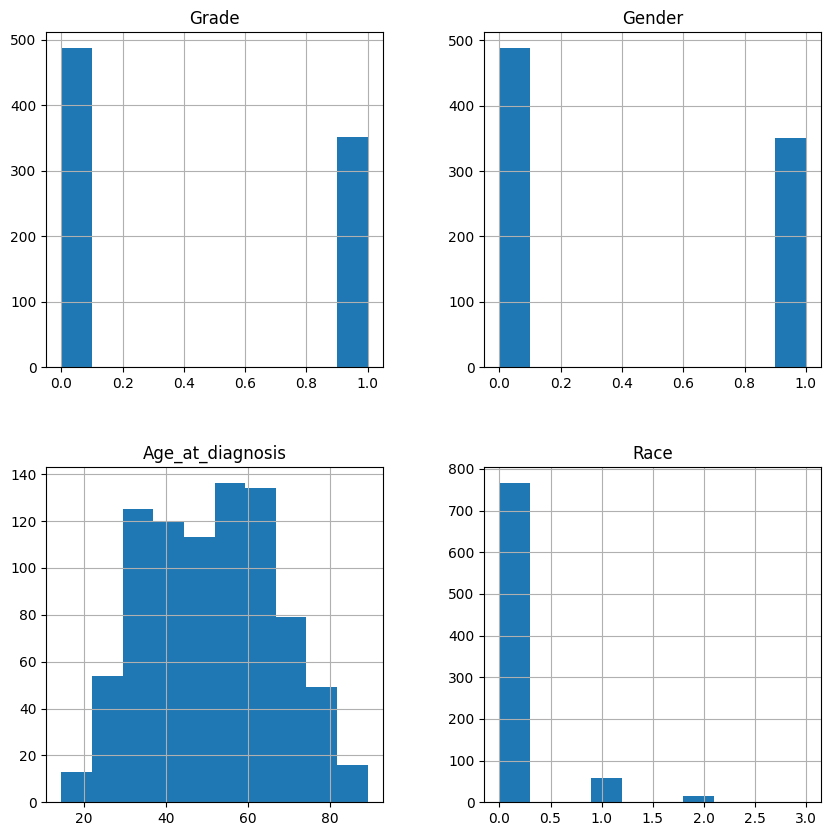

In [33]:
df_numvar = df[["Grade","Gender","Age_at_diagnosis", "Race"]]

df_numvar.hist(figsize=(10, 10))
plt.show()

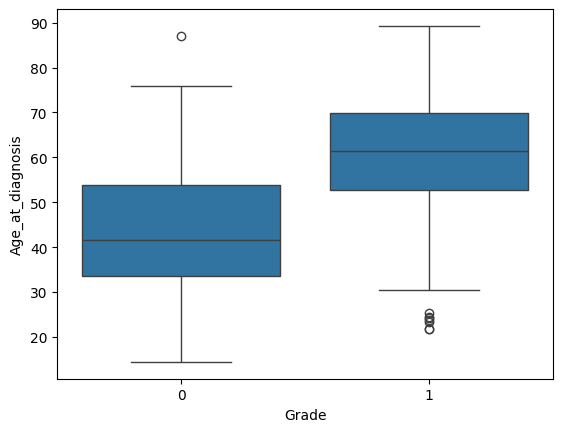

In [34]:
import seaborn as sns
sns.boxplot(x = "Grade", y = "Age_at_diagnosis", data=df)
plt.show()

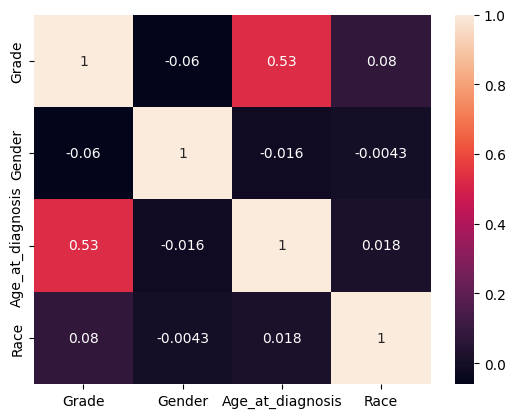

In [35]:
df_corr = df_numvar.corr()
sns.heatmap(df_corr, annot=True)
plt.show()

- En este ejercicio vas a entrenar un árbol de decisión con diferentes profundidas. Asimismo, en gráfica mostrarás las exactitudes en entrenamiento y test, usando un stratified k-fold cross-validation con K= 10
- Los valores de las profundides a evaluar son 2, 5, 10, 15, 20, 25, 30 y None
- Deberás usar StratifiedKFold con 10 particiones, y un valor aleaotorio de 3
- Entrenarás y evaluarás un árbol de decisión con estos distintos valores de profundidades
- Usa cross_val_score para entrenar los modelos, usando como métrica de evaluación en scoring ="f1_macro",y el StratifiedKFold, con un valor aleatorio = 7
- Muestra una fráfica para los distintos resultados  cuando se usa F1 Macro

In [37]:
X = df.drop('Grade', axis=1)  # Todas las columnas excepto 'Grade'
y = df['Grade']  # Columna 'Grade' como variable objetivo


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.82      0.88       150
           1       0.78      0.94      0.85       102

    accuracy                           0.87       252
   macro avg       0.87      0.88      0.87       252
weighted avg       0.88      0.87      0.87       252

[[123  27]
 [  6  96]]


#______________________________________________________

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       150
           1       0.78      0.94      0.85       102

    accuracy                           0.87       252
   macro avg       0.87      0.88      0.87       252
weighted avg       0.88      0.87      0.87       252

[[123  27]
 [  6  96]]


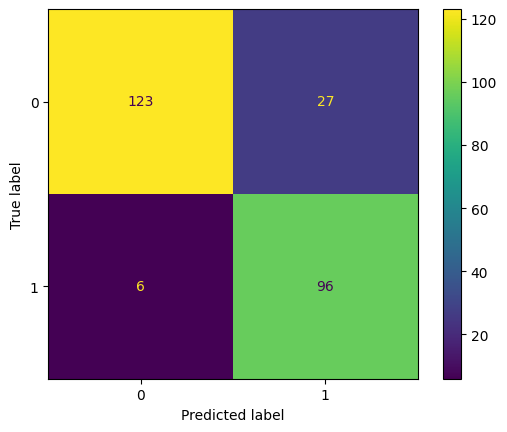

In [40]:

### Paso 4: Evaluar rendimiento

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()


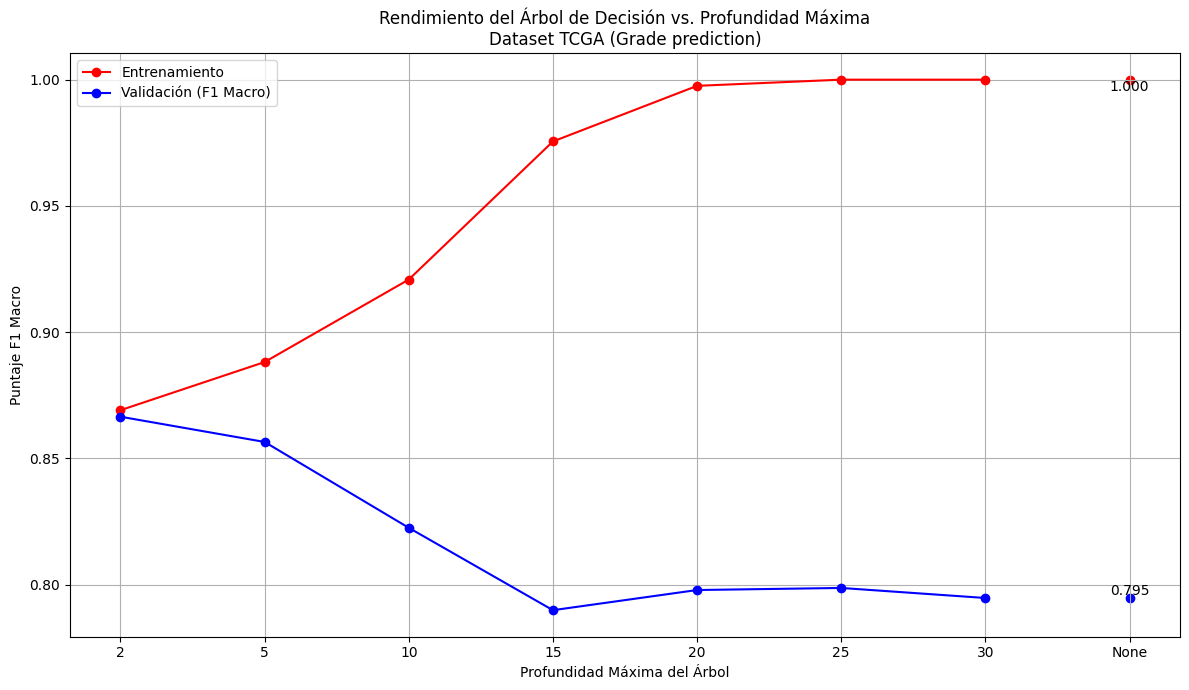


Mejor profundidad: 2 con F1 Macro de validación: 0.8665


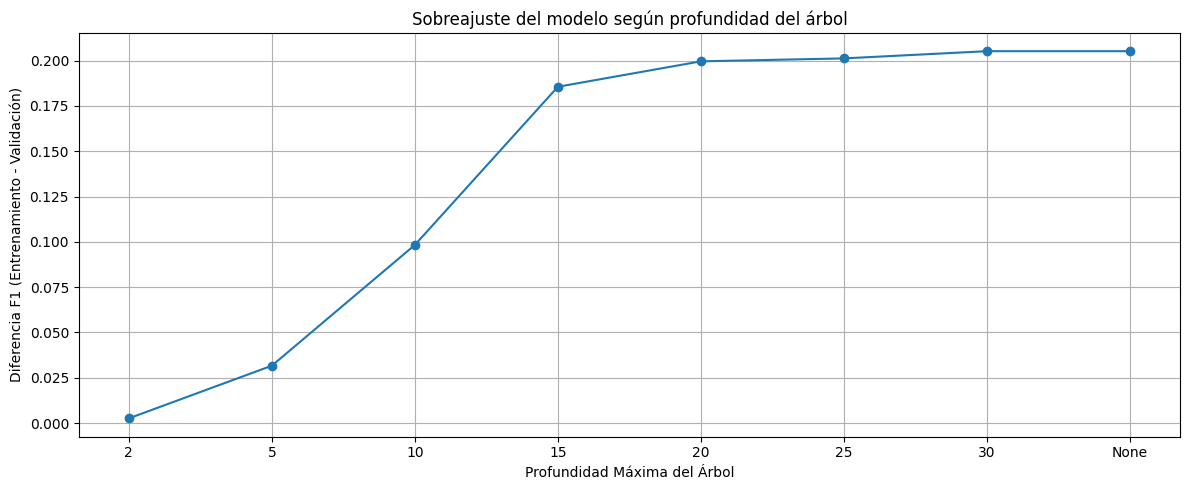

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder


# Preparar los datos
X = df.drop('Grade', axis=1)  # Todas las columnas excepto Grade
y = df['Grade']  # Variable objetivo


# Configurar los parámetros a evaluar
max_depths = [2, 5, 10, 15, 20, 25, 30, None]
k_folds = 10
random_state = 3

# Preparar para almacenar los resultados
train_scores = []
test_scores = []

# Configurar KFold estratificado
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=random_state)

# Evaluar cada profundidad
for depth in max_depths:
    # Crear el modelo
    model = DecisionTreeClassifier(max_depth=depth, random_state=7)

    # Evaluar con cross_val_score usando F1 macro (importante para problemas multiclase)
    cv_scores = cross_val_score(model, X, y, cv=skf, scoring='f1_macro')

    # Almacenar resultados de validación
    test_scores.append(cv_scores.mean())

    # Evaluar en entrenamiento (para comparación)
    model.fit(X, y)
    train_pred = model.predict(X)
    train_score = f1_score(y, train_pred, average='macro')
    train_scores.append(train_score)

# Graficar los resultados
plt.figure(figsize=(12, 7))
plt.plot([str(d) if d is not None else 'None' for d in max_depths[:-1]],
         train_scores[:-1], 'o-', color='r', label='Entrenamiento')
plt.plot([str(d) if d is not None else 'None' for d in max_depths[:-1]],
         test_scores[:-1], 'o-', color='b', label='Validación (F1 Macro)')

# Añadir los resultados para profundidad None (ilimitada)
plt.scatter('None', test_scores[-1], color='b', label='_nolegend_')
plt.scatter('None', train_scores[-1], color='r', label='_nolegend_')
plt.text('None', test_scores[-1], f'{test_scores[-1]:.3f}', ha='center', va='bottom')
plt.text('None', train_scores[-1], f'{train_scores[-1]:.3f}', ha='center', va='top')

plt.xlabel('Profundidad Máxima del Árbol')
plt.ylabel('Puntaje F1 Macro')
plt.title('Rendimiento del Árbol de Decisión vs. Profundidad Máxima\nDataset TCGA (Grade prediction)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar los mejores resultados
best_depth_idx = np.argmax(test_scores)
best_depth = max_depths[best_depth_idx]
print(f"\nMejor profundidad: {best_depth} con F1 Macro de validación: {test_scores[best_depth_idx]:.4f}")

# Análisis de sobreajuste
overfitting = [train - test for train, test in zip(train_scores, test_scores)]
plt.figure(figsize=(12, 5))
plt.plot([str(d) if d is not None else 'None' for d in max_depths], overfitting, 'o-')
plt.xlabel('Profundidad Máxima del Árbol')
plt.ylabel('Diferencia F1 (Entrenamiento - Validación)')
plt.title('Sobreajuste del modelo según profundidad del árbol')
plt.grid(True)
plt.tight_layout()
plt.show()

4. Optimización de hiperparámetros con RandomizedSearchCV

- Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:
  - Criterion = gini ,entropy
  - max_depth: de 5 a 50 con incrementos de 1
  - min_samples_split: de 2 a 20 con incrementos de 1
- Usa el árbol de decisión
- StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
- n_iter = 5 (combinaciones aleatorias a buscar)
- n_jobs = -1 para acelerar cómputo
- Métrica de evaluación: f1 Macro
- Imprime los mejores hiperparámetros encontrados
- Imprime el best_score

In [47]:
X = df.drop('Grade', axis=1)  # Todas las columnas excepto 'Grade' son características
y = df['Grade']  # 'Grade' es la variable objetivo (0 o 1)

# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5, 51, 1),  # Valores de 5 a 50 con incrementos de 1
    'min_samples_split': np.arange(2, 21, 1)  # Valores de 2 a 20 con incrementos de 1
}

# Configurar el modelo y la búsqueda aleatoria
model = DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=10)  # 10 folds estratificados

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,  # 5 combinaciones aleatorias
    cv=cv,
    scoring='f1_macro',  # Métrica F1 Macro
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1
)

# Ejecutar la búsqueda de hiperparámetros (sin división train-test adicional)
random_search.fit(X, y)

print("-------Resultados-------")
print("\nMejores hiperparámetros encontrados:")
print(random_search.best_params_)
print("\nMejor puntuación F1 Macro:")
print(f"{random_search.best_score_:.4f}")

Fitting 10 folds for each of 5 candidates, totalling 50 fits
-------Resultados-------

Mejores hiperparámetros encontrados:
{'min_samples_split': np.int64(16), 'max_depth': np.int64(14), 'criterion': 'entropy'}

Mejor puntuación F1 Macro:
0.8411


5. Optimización de hiperparámetros con GridSearchCV

- Define el espacio de búsqueda  para los siguientes hiperpárametros:
  - Criterion = gini ,entropy
  - max_depth: de 5 a 50 con incrementos de 1
  - min_samples_split: de 2 a 20 con incrementos de 1
- Usa el árbol de decisión
- StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
- Métrica de evaluación: f1 Macro
n_jobs = -1 para acelerar cómputo
- Imprime los mejores hiperparámetros encontrados
- Imprime el best_score

In [53]:
X = df.drop('Grade', axis=1)  # Todas las columnas excepto 'Grade' son características
y = df['Grade']  # 'Grade' es la variable objetivo (0 o 1)

# Definir el espacio de búsqueda exhaustivo
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5, 51, 1).tolist(),  # Valores de 5 a 50 con incrementos de 1
    'min_samples_split': np.arange(2, 21, 1).tolist()  # Valores de 2 a 20 con incrementos de 1
}

# Configurar el modelo y la búsqueda en cuadrícula
model = DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=10)  # 10 folds estratificados

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=cv,
    scoring='f1_macro',  # Métrica F1 Macro
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1
)

# Ejecutar la búsqueda de hiperparámetros (sin división train-test adicional)
grid_search.fit(X, y)

# 6. Mostrar los resultados
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("\nMejor puntuación F1 Macro:")
print(f"{grid_search.best_score_:.4f}")

Fitting 10 folds for each of 1748 candidates, totalling 17480 fits

Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 17}

Mejor puntuación F1 Macro:
0.8615


6. Optimización de hiperparámetros con RandomizedSearchCV: Accuracy

- Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:
  - Criterion = gini ,entropy
  - max_depth: de 5 a 50 con incrementos de 1
  - min_samples_split: de 2 a 20 con incrementos de 1
- Usa el árbol de decisión
- StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
- n_iter = 5 (combinaciones aleatorias a buscar)
- n_jobs = -1 para acelerar cómputo
- Métrica de evaluación: accuracy
- Imprime los mejores hiperparámetros encontrados
- Imprime el best_score


In [54]:
# 2. Preparar los datos
X = df.drop('Grade', axis=1)  # Todas las columnas excepto 'Grade' son características
y = df['Grade']  # 'Grade' es la variable objetivo

# 3. Definir el espacio de búsqueda aleatorio
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5, 51, 1),  # Valores de 5 a 50 con incrementos de 1
    'min_samples_split': np.arange(2, 21, 1)  # Valores de 2 a 20 con incrementos de 1
}

# 4. Configurar el modelo y la búsqueda aleatoria
model = DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=10)  # 10 folds estratificados

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,  # 5 combinaciones aleatorias
    cv=cv,
    scoring='accuracy',  # Métrica de evaluación: accuracy
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1,
    random_state=42  # Semilla para reproducibilidad
)

# 5. Ejecutar la búsqueda de hiperparámetros
random_search.fit(X, y)

# 6. Mostrar los resultados
print("\nMejores hiperparámetros encontrados:")
print(random_search.best_params_)
print("\nMejor precisión (accuracy):")
print(f"{random_search.best_score_:.4f}")  # Mostrar con 4 decimales

Fitting 10 folds for each of 5 candidates, totalling 50 fits

Mejores hiperparámetros encontrados:
{'min_samples_split': np.int64(17), 'max_depth': np.int64(35), 'criterion': 'entropy'}

Mejor precisión (accuracy):
0.8367


7. Optimización de hiperparámetros con GridSearchCV: accuracy

- Define el espacio de búsqueda  para los siguientes hiperpárametros:
  - Criterion = gini ,entropy
  - max_depth: de 5 a 50 con incrementos de 1
  - min_samples_split: de 2 a 20 con incrementos de 1
- Usa el árbol de decisión
- StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
- Métrica de evaluación: f1 Macro
- n_jobs = -1 para acelerar cómputo
- Imprime los mejores hiperparámetros encontrados
- Imprime el best_score


In [55]:
# import pandas as pd
# import numpy as np
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV, StratifiedKFold


X = df.drop('Grade', axis=1)  # Todas las columnas excepto 'Grade' son características
y = df['Grade']              # 'Grade' es la variable objetivo

# 3. Definir el espacio de búsqueda exhaustivo
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5, 51)),       # Valores de 5 a 50 con incrementos de 1
    'min_samples_split': list(range(2, 21)) # Valores de 2 a 20 con incrementos de 1
}

# 4. Configurar el modelo y la búsqueda en cuadrícula
model = DecisionTreeClassifier(random_state=42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 10 folds estratificados

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',  # Métrica de evaluación: accuracy
    n_jobs=-1,          # Usar todos los núcleos disponibles
    verbose=1           # Mostrar progreso
)

# 5. Ejecutar la búsqueda de hiperparámetros
grid_search.fit(X, y)

# 6. Mostrar los resultados
print("\n=== Resultados de GridSearchCV ===")
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("\nMejor precisión (accuracy):")
print(f"{grid_search.best_score_:.4f}")  # Mostrar con 4 decimales

# Opcional: Mostrar todos los resultados
# import pandas as pd
# results = pd.DataFrame(grid_search.cv_results_)
# print(results[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False))

Fitting 10 folds for each of 1748 candidates, totalling 17480 fits

=== Resultados de GridSearchCV ===

Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 12}

Mejor precisión (accuracy):
0.8653
